In [55]:
import pandas as pd
from surprise import Dataset
from surprise import Reader
from surprise import KNNWithMeans
from surprise.model_selection import cross_validate
from surprise.model_selection import train_test_split
import numpy as np
import pickle
import random 
from surprise import accuracy
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

In [2]:
from surprise import NMF, CoClustering, SVD

In [3]:
random.seed(10)

In [4]:
ratings = pd.read_csv('ml-latest/ratings.csv')
#print(ratings.head())
movies = pd.read_csv("movies_FINAL.csv")
#print(movies.head())

In [5]:
reader = Reader(rating_scale=(0.5, 5))
data = Dataset.load_from_df(ratings[["userId", "movieId", "rating"]], reader)

In [6]:
trainset, testset = train_test_split(data, test_size=.2)

In [7]:
#algo = SVD()
#algo.fit(trainset)
#pickle.dump(algo, open(filename, 'wb'))

In [8]:
filename = 'SVD_model.sav'
algo = pickle.load(open(filename, 'rb'))

In [9]:
algo.predict(1, 307, r_ui =3.5,verbose=True)

user: 1          item: 307        r_ui = 3.50   est = 3.98   {'was_impossible': False}


Prediction(uid=1, iid=307, r_ui=3.5, est=3.976031439838299, details={'was_impossible': False})

In [10]:
predictions = algo.test(testset)

In [11]:
predictions[0:10]

[Prediction(uid=79482, iid=736, r_ui=1.0, est=2.1714089626230724, details={'was_impossible': False}),
 Prediction(uid=264996, iid=1527, r_ui=5.0, est=4.566515707733246, details={'was_impossible': False}),
 Prediction(uid=115403, iid=4027, r_ui=4.5, est=4.020351913099127, details={'was_impossible': False}),
 Prediction(uid=43770, iid=2905, r_ui=5.0, est=4.841380552402743, details={'was_impossible': False}),
 Prediction(uid=204977, iid=8644, r_ui=2.5, est=2.6096298290086306, details={'was_impossible': False}),
 Prediction(uid=52461, iid=1947, r_ui=5.0, est=3.406693694701712, details={'was_impossible': False}),
 Prediction(uid=40850, iid=34, r_ui=2.0, est=2.237357419925726, details={'was_impossible': False}),
 Prediction(uid=182978, iid=923, r_ui=4.0, est=3.8857572441059096, details={'was_impossible': False}),
 Prediction(uid=96427, iid=3114, r_ui=4.0, est=3.9582598467804697, details={'was_impossible': False}),
 Prediction(uid=105594, iid=3255, r_ui=4.0, est=4.216590641742894, details={'w

In [101]:
def isLiked(pred):
    return (pred.r_ui>3.5)*1

In [102]:
def isRecommended(pred):
    return (pred.est>3.5)*1

In [103]:
recommend = list(map(isRecommended, predictions))

In [104]:
liked = list(map(isLiked, predictions))

In [105]:
cm =confusion_matrix(liked, recommend)

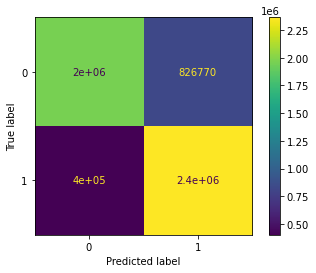

In [106]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [107]:
accuracy_score(liked, recommend)

0.7786163123172637

In [108]:
precision_score(liked, recommend, average='binary')

0.7408712408041683

In [110]:
f1_score(liked, recommend, average='binary')

0.7936970447468321

In [20]:
#rmse for rating prediction NOT recommendation
accuracy.rmse(predictions)

RMSE: 0.7030


0.7029522380735811

In [21]:
#algo2 = NMF()
#algo2.fit(trainset)
#pickle.dump(algo, open(filename2, 'wb'))

In [22]:
filename2 = 'NMF_model.sav'
algo2 = pickle.load(open(filename2, 'rb'))

In [23]:
predictions2 = algo2.test(testset)

In [24]:
recommend2 = list(map(isRecommended, predictions2))

In [25]:
cm2 =confusion_matrix(liked, recommend2)

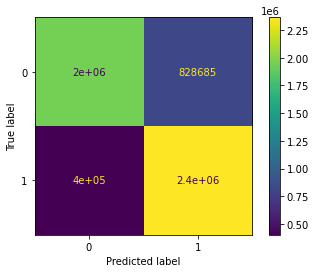

In [26]:
disp2 = ConfusionMatrixDisplay(confusion_matrix=cm2)
disp2.plot()
plt.show()

In [27]:
accuracy_score(liked, recommend2)

0.7781911398747074

In [28]:
precision_score(liked, recommend2, average='binary')

0.7404934065280226

In [29]:
algo2.predict(1, 307, r_ui =3.5,verbose=True)

user: 1          item: 307        r_ui = 3.50   est = 3.98   {'was_impossible': False}


Prediction(uid=1, iid=307, r_ui=3.5, est=3.976031439838299, details={'was_impossible': False})

In [30]:
predictions2 = algo2.test(testset)
accuracy.rmse(predictions2)

RMSE: 0.7030


0.7029522380735811

In [ ]:
#d = data.build_full_trainset()

In [ ]:
#algo4 = CoClustering()
#algo4.fit(d)
#pickle.dump(algo4, open(filename3, 'wb'))

In [11]:
filename3 = 'Cluster_model.sav'
algo3 = pickle.load(open(filename3, 'rb'))

In [12]:
predictions3 = algo3.test(testset)

In [13]:
recommend3 = list(map(isRecommended, predictions3))

In [15]:
cm3 =confusion_matrix(liked, recommend3)

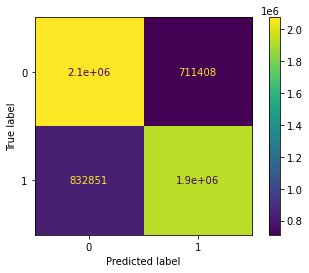

In [16]:
disp3 = ConfusionMatrixDisplay(confusion_matrix=cm3)
disp3.plot()
plt.show()

In [17]:
accuracy_score(liked, recommend3)

0.7217896733180331

In [18]:
precision_score(liked, recommend3, average='binary')

0.7310525352758023

In [20]:
predictions3 = algo3.test(testset)
accuracy.rmse(predictions3)

RMSE: 0.8765


0.87648006846097

SVD - RMSE: 0.7950 - 910 MB
NMF - RMSE: 0.8777 - 910 MB
CoClustering - RMSE: 0.8759 - 824 MB

Modele są bardzo podobne jednak SVD jest odrobinę lepszy od pozostałych oraz szybszy, więc na nim się skupimy

Najważniejszą metryką w naszym modelu jest przede wszystkim f1 i precision, ponieważ chcemy zminimalizować ilość False Positives. Zarekomendowanie złego filmu jest dla nas gorsze od pominięcia dobrego. 

Poniżej przetestowane inne odcięcia rekomendacji. Oczywiście im mniejsze odcięcie tym lepsze metryki, ale nie chcemy uznawać filmu ocenianego na 2.5 na warty polecenia. Dla wartości 3 metryki nie są znacząco lepsze, więc zostajemy na 3.5 .

Same hiperparametry modelów zostawiamy automatycznie ponieważ ich trenowanie zajmuje naprawdę dużo czasu

In [56]:
def isLiked(pred):
    return (pred.r_ui>4)*1

In [57]:
def isRecommended(pred):
    return (pred.est>4)*1

In [58]:
recommend = list(map(isRecommended, predictions))

In [59]:
liked = list(map(isLiked, predictions))

In [60]:
cm =confusion_matrix(liked, recommend)

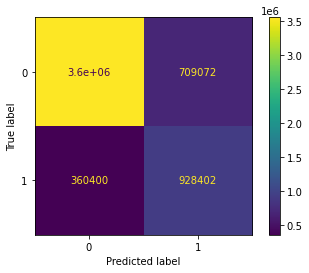

In [61]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [62]:
accuracy_score(liked, recommend)

0.8073262616586878

In [63]:
precision_score(liked, recommend, average='binary')

0.5669720557395109

In [64]:
f1_score(liked, recommend, average='binary')

0.6345279802725375

In [65]:
def isLiked(pred):
    return (pred.r_ui>4.5)*1

In [66]:
def isRecommended(pred):
    return (pred.est>4.5)*1

In [67]:
recommend = list(map(isRecommended, predictions))

In [68]:
liked = list(map(isLiked, predictions))

In [69]:
cm =confusion_matrix(liked, recommend)

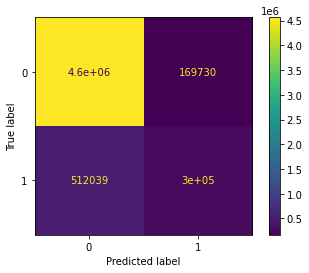

In [70]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [71]:
accuracy_score(liked, recommend)

0.8771739868690175

In [72]:
precision_score(liked, recommend, average='binary')

0.6403903522153294

In [73]:
f1_score(liked, recommend, average='binary')

0.4699671999110612

In [74]:
def isLiked(pred):
    return (pred.r_ui>3)*1

In [75]:
def isRecommended(pred):
    return (pred.est>3)*1

In [76]:
recommend = list(map(isRecommended, predictions))

In [77]:
liked = list(map(isLiked, predictions))

In [78]:
cm =confusion_matrix(liked, recommend)

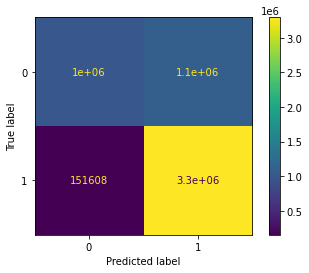

In [79]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [80]:
accuracy_score(liked, recommend)

0.7741660539799654

In [81]:
precision_score(liked, recommend, average='binary')

0.7493521272721607

In [82]:
f1_score(liked, recommend, average='binary')

0.8401574333257165

In [83]:
def isLiked(pred):
    return (pred.r_ui>2.5)*1

In [84]:
def isRecommended(pred):
    return (pred.est>2.5)*1

In [85]:
recommend = list(map(isRecommended, predictions))

In [86]:
liked = list(map(isLiked, predictions))

In [87]:
cm =confusion_matrix(liked, recommend)

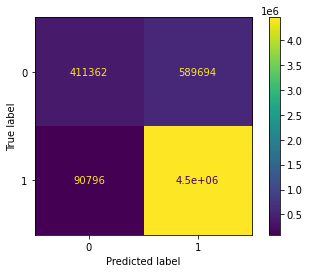

In [88]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [89]:
accuracy_score(liked, recommend)

0.8774044087139452

In [90]:
precision_score(liked, recommend, average='binary')

0.8831949333380343

In [91]:
f1_score(liked, recommend, average='binary')

0.9291020657700786

In [92]:
def isLiked(pred):
    return (pred.r_ui>2)*1

In [93]:
def isRecommended(pred):
    return (pred.est>2)*1

In [94]:
recommend = list(map(isRecommended, predictions))

In [95]:
liked = list(map(isLiked, predictions))

In [96]:
cm =confusion_matrix(liked, recommend)

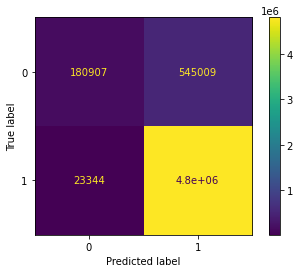

In [97]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [98]:
accuracy_score(liked, recommend)

0.8976067655745079

In [99]:
precision_score(liked, recommend, average='binary')

0.8980612886561109

In [100]:
f1_score(liked, recommend, average='binary')

0.9441214030463039

In [111]:
def isLiked(pred):
    return (pred.r_ui>1)*1

In [112]:
def isRecommended(pred):
    return (pred.est>1)*1

In [113]:
recommend = list(map(isRecommended, predictions))

In [114]:
liked = list(map(isLiked, predictions))

In [115]:
cm =confusion_matrix(liked, recommend)

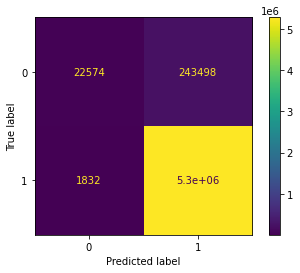

In [116]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [117]:
accuracy_score(liked, recommend)

0.9558018833337627

In [118]:
precision_score(liked, recommend, average='binary')

0.955938195709485

In [119]:
f1_score(liked, recommend, average='binary')

0.9773071622159117